# Import Library

In [1]:
# install tensorflowjs
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible

In [2]:
# import libraries
import os
import io
import gdown
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

from IPython.display import FileLink
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

2025-06-08 07:18:53.723951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749367133.899200      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749367133.949070      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!pip uninstall -y protobuf mediapipe
!pip install protobuf==3.20.3
!pip install mediapipe==0.10.5


Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
google-spark-connect 0.5.2 requires google-api-core>=2.19.1, but you have google-api-core 1.34.1 which is incompatible.
tensorflow-metadata 1.17.0 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
google-cloud-bigtable 2.30.0 requires google-api-core[grpc]<3.0.0,>=2.16.0, but you have google-api-core 1.34.1 which is incompatible.
google-cloud-storage 2.19.0 requires google-api-core<3.0.0dev,>=2.15.0, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq

In [6]:
# !pip install --upgrade mediapipe
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task


In [5]:
import google.protobuf
print(google.protobuf.__version__)


3.20.3


In [4]:
import mediapipe as mp
print(mp.__version__)


0.10.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


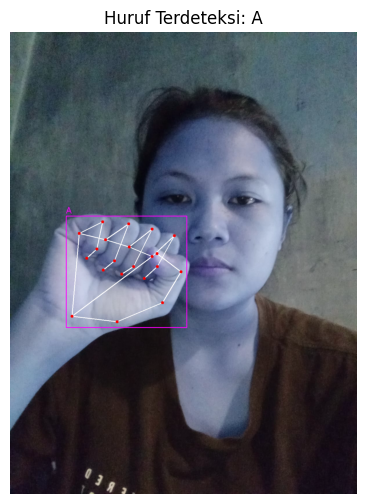

# Get Dataset 

In [6]:
# download zip file dataset from url

# SIBI datasets : https://drive.google.com/file/d/1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv/view?usp=sharing
!gdown 1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv

Downloading...
From (original): https://drive.google.com/uc?id=1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv
From (redirected): https://drive.google.com/uc?id=1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv&confirm=t&uuid=fbe28c2d-7900-48ae-af02-b85611742779
To: /kaggle/working/SIBI_datasets.zip
100%|█████████████████████████████████████████| 780M/780M [00:07<00:00, 105MB/s]


In [7]:
# unzip dataset
!unzip SIBI_datasets.zip

Archive:  SIBI_datasets.zip
   creating: SIBI_datasets/
   creating: SIBI_datasets/val/
   creating: SIBI_datasets/val/U/
  inflating: SIBI_datasets/val/U/2871.jpg  
  inflating: SIBI_datasets/val/U/2555.jpg  
  inflating: SIBI_datasets/val/U/U2579.jpg  
  inflating: SIBI_datasets/val/U/U2807.jpg  
  inflating: SIBI_datasets/val/U/U2395.jpg  
  inflating: SIBI_datasets/val/U/590.jpg  
  inflating: SIBI_datasets/val/U/U1446.jpg  
  inflating: SIBI_datasets/val/U/U884.jpg  
  inflating: SIBI_datasets/val/U/2455.jpg  
  inflating: SIBI_datasets/val/U/U774.jpg  
  inflating: SIBI_datasets/val/U/U2062.jpg  
  inflating: SIBI_datasets/val/U/U208.jpg  
  inflating: SIBI_datasets/val/U/U1617.jpg  
  inflating: SIBI_datasets/val/U/2385.jpg  
  inflating: SIBI_datasets/val/U/U190.jpg  
  inflating: SIBI_datasets/val/U/U107.jpg  
  inflating: SIBI_datasets/val/U/2966.jpg  
  inflating: SIBI_datasets/val/U/U289.jpg  
  inflating: SIBI_datasets/val/U/U1612.jpg  
  inflating: SIBI_datasets/val/U/U25

In [8]:
# delete zip file
file_path = '/kaggle/working/SIBI_datasets.zip'
if os.path.exists(file_path):
    os.remove(file_path)
    print("File SIBI_datasets.zip deleted successfully.")
else:
    print("File SIBI_datasets.zip doesn't exist.")

File SIBI_datasets.zip deleted successfully.


## Dataset Distribution

In [9]:
# show dataset distribution
data_dir = '/kaggle/working/SIBI_datasets'

data = []
split_folders = ([name for name in os.listdir(data_dir)])

for split in split_folders:
    alphabets = sorted(os.listdir(os.path.join(data_dir, split)))
    for alphabet in alphabets:
        img_files = os.listdir(os.path.join(data_dir,split,alphabet))
        num_imgs = len(img_files)
        data.append({'Folder': split, 'Alfabet': alphabet, 'Jumlah': num_imgs})

df = pd.DataFrame(data)

print("-- Distribusi SIBI Dataset --\n")
x = df.pivot(index='Alfabet', columns='Folder', values='Jumlah').reset_index()
x.columns.name = None
print(x)

# grouped data distribution by folder
groupby_df = df.groupby('Folder').agg({'Jumlah': 'sum'}).reset_index()

print(f"\n{groupby_df}")
print(f"\nTotal gambar: {groupby_df['Jumlah'].sum()}")

-- Distribusi SIBI Dataset --

   Alfabet  test  train  val
0        A   100    800  100
1        B   100    800  100
2        C   100    800  100
3        D   100    800  100
4        E   100    800  100
5        F   100    800  100
6        G   100    800  100
7        H   100    800  100
8        I   100    800  100
9        J   100    800  100
10       K   100    800  100
11       L   100    800  100
12       M   100    800  100
13       N   100    800  100
14       O   100    800  100
15       P   100    800  100
16       Q   100    800  100
17       R   100    800  100
18       S   100    800  100
19       T   100    800  100
20       U   100    800  100
21       V   100    800  100
22       W   100    800  100
23       X   100    800  100
24       Y   100    800  100
25       Z   100    800  100

  Folder  Jumlah
0   test    2600
1  train   20800
2    val    2600

Total gambar: 26000


# Load and Preprocess Dataset

In [10]:
# load and preprocess dataset
image_size = (224, 224)
batch_size = 32

train_dir = os.path.join(data_dir, 'train')
val_dir =  os.path.join(data_dir, 'val')
test_dir =  os.path.join(data_dir, 'test')

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                          label_mode='categorical',
                                                          image_size=image_size,
                                                          batch_size=batch_size,
                                                          shuffle=True,
                                                          seed=42)


val_data = tf.keras.utils.image_dataset_from_directory(directory=val_dir,
                                                        label_mode='categorical',
                                                        image_size=image_size,
                                                        batch_size=batch_size,
                                                        shuffle=False)

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        label_mode='categorical',
                                                        image_size=image_size,
                                                        batch_size=1,
                                                        shuffle=False)

num_classes = len(train_data.class_names)
class_names = train_data.class_names

print(f"\nClasses {num_classes}: {class_names}")

Found 20800 files belonging to 26 classes.


I0000 00:00:1749364640.019036      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749364640.019716      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 2600 files belonging to 26 classes.
Found 2600 files belonging to 26 classes.

Classes 26: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Data Augmentation Layer

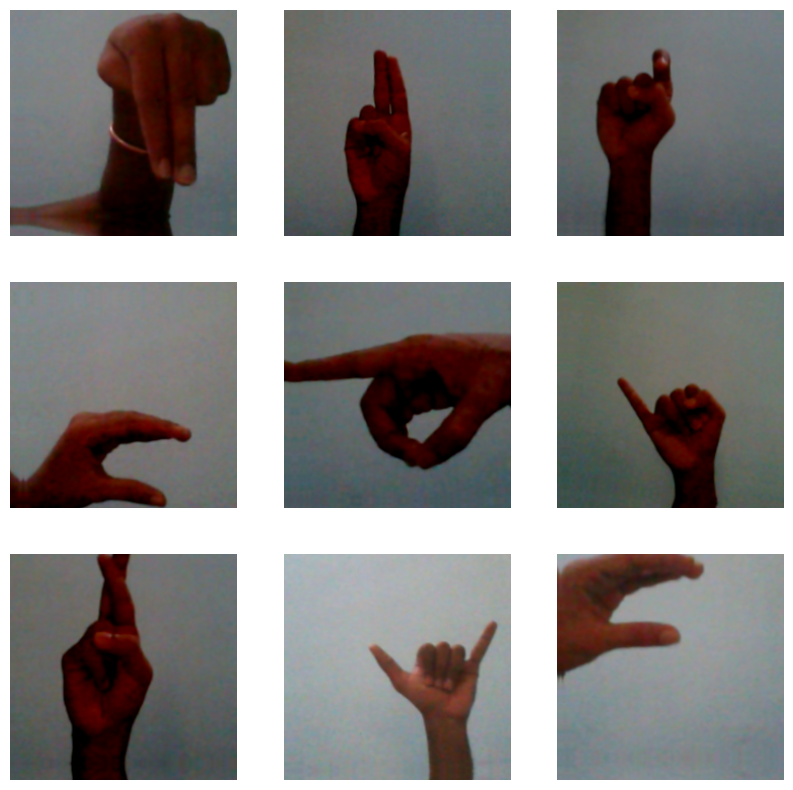

In [11]:
# data augmentation layer
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomZoom(0.2),
                                         tf.keras.layers.RandomRotation(0.03),
                                         tf.keras.layers.RandomTranslation(0.1, 0.1),
                                         tf.keras.layers.RandomBrightness([-0.3,0.3]),
                                         tf.keras.layers.RandomContrast(0.2),
                                         tf.keras.layers.RandomFlip("horizontal")])


# augmentation function
def apply_augment(image, label):
    image = data_augmentation(image, training=True)
    return image, label

# apply augmentation to train_data
train_data_augmented = train_data.map(apply_augment, num_parallel_calls=tf.data.AUTOTUNE)

# show example of augmentated images
for image, _ in train_data_augmented.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    display_image = image[i]
    plt.imshow(display_image / 255)
    plt.axis('off')
      
# optimize dataset performance
train_data_augmented = train_data_augmented.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Help Functions

## Create Model for Transfer Learning

In [12]:
# select base model
def base_models(base):
    if base == 'resnet':
        print("> Instantiating ResNet50 model...")
        base_model = tf.keras.applications.ResNet50(include_top=False,
                            weights='imagenet', input_shape=(224,224,3))
        base_model.trainable = False
        
        preprocess_input = tf.keras.applications.resnet.preprocess_input
        
    elif base == 'densenet':
        print("> Instantiating DenseNet121 model...")
        base_model = tf.keras.applications.DenseNet121(include_top=False,
                            weights='imagenet', input_shape=(224,224,3))
        base_model.trainable = False
        
        preprocess_input = tf.keras.applications.densenet.preprocess_input
        
    elif base == 'mobilenetv2':
        print("> Instantiating MobileNetV2 model...")
        base_model = tf.keras.applications.MobileNetV2(include_top=False,
                            weights='imagenet', input_shape=(224,224,3))
        base_model.trainable = False
        
        preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
    else:
        message = "ERROR: Base model is not available."
        return message
    return base_model, preprocess_input
    
# create transfer learning model 
def custom_tlmodel(num_classes, base, dense_layer_units=None):
    base_model, preprocess_input = base_models(base)
        
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if dense_layer_units:
        print(f"Adding additional dense layers with units: {dense_layer_units}")
        for units in dense_layer_units:
            x = tf.keras.layers.Dense(units, activation='relu')(x)
                
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    
    model.summary(show_trainable=True)

    print(f"\nCreate model with base model: {base}, dense layer: {dense_layer_units}, classes: {num_classes}")
    
    return model

## Model Training and Visualization 

In [13]:
# compile and train model
def train_model(model, train_data_augmented, val_data, epoch):       
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                                       patience=3,verbose=1, min_lr=0.0)

    print("\n> Start model training...\n")
    history = model.fit(train_data_augmented,
                          validation_data=val_data,
                          epochs=epoch,
                          verbose=1,
                          callbacks=[lr_callback])
    print("\n> Model training completed.\n")
    return model, history

# visualize model training history
def visualize_history(history):        
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # plot acuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Train Acc')
    plt.plot(val_accuracy, label='Val Acc')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    
    # plot loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

## Model Evaluation

In [14]:
# evaluate model accuracy on test_data
def evaluate_model(model, test_data):
    print("\n> Evaluating model...")
    testLoss, testAcc = model.evaluate(test_data, verbose=1)
    print(f'Accuracy on test data: {testAcc:.4f}')
    print(f'Loss on test data: {testLoss:.4f}')

# use model to make prediction on test_data
def predict_model(model, test_data, class_names):
    print("\n> Predicting images in test_data...")
    predictions = model.predict(test_data, verbose=1)
    predicted_indices = tf.argmax(predictions, axis=1).numpy()
    
    # get predicted labels
    predicted_labels = []
    for predicted_class_index in predicted_indices:
        predicted_label_name = class_names[predicted_class_index]
        predicted_labels.append(predicted_label_name)

    # get true labels
    true_labels = []
    for images, labels in test_data:
        for one_hot_label in labels.numpy():
            class_index = tf.argmax(one_hot_label).numpy()
            true_label_name = class_names[class_index]
            true_labels.append(true_label_name)
    return true_labels, predicted_labels

# visualize confusion matrix
def visualize_prediction(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(10,8))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=18, pad=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# print model performance evaluation
def print_evaluation(model, test_data, class_names):
    evaluate_model(model, test_data)
    true_labels, predicted_labels = predict_model(model, test_data, class_names)
    print("\n> Print Classification Report :")
    print(classification_report(true_labels, predicted_labels))
    visualize_prediction(true_labels, predicted_labels, class_names)

## Save Model and Convert Model to TensorFlow.js

In [16]:
# save model and convert model to TensorFlow.js
def save_convert_model(model, model_name, model_extentions):
    # create directory for saved model
    saved_model_path = 'saved_models/'
    os.makedirs(saved_model_path, exist_ok=True)
    
    # save model with various extentions        
    for extention in model_extentions:
        saved_model_file = os.path.join(saved_model_path, f"{model_name}.{extention}")
        print("\n----------------------------------------------------------------------------")
        if extention == "pkl":
            try:
                print(f"\n> Saving model '{saved_model_file}'...")
                joblib.dump(model, saved_model_file)
                print(f"Model: '{saved_model_file}' saved successfully.")
            except Exception as e:
                print(f"ERROR: Failed to save model.\nDetails : {e}")
        else:    
            try:
                print(f"\n> Saving model '{saved_model_file}'...")
                model.save(saved_model_file)
                print(f"Keras model: '{saved_model_file}' saved successfully.")
            except Exception as e:
                print(f"ERROR: Failed to save model.\nDetails : {e}")
                
    print("\n----------------------------------------------------------------------------")
    # create directory for tfjs model
    tfjs_path = 'tfjs_models/'
    tfjs_output_dir = os.path.join(tfjs_path, model_name)
    os.makedirs(tfjs_output_dir, exist_ok=True)

    # convert model to tfjs format
    try:
        print(f"\n> Converting '{model_name}' model to TensorFlow.js...")
        tfjs.converters.save_keras_model(model, tfjs_output_dir)
        print(f"Model successfully converted to tfjs and saved at: '{tfjs_output_dir}'")
    except Exception as e:
        print(f"ERROR: Failed to convert the model to tfjs.\nDetails: {e}")
    print("\n----------------------------------------------------------------------------")

## Images Prediction

In [23]:
import numpy as np
from PIL import Image
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess
from tensorflow.keras.preprocessing import image as keras_image

# Mapping label huruf A-Z
label_map = [chr(i) for i in range(65, 91)]

# MediaPipe Hand Landmark
base_options = python.BaseOptions(model_asset_path='/kaggle/working/hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Koneksi tangan dari MediaPipe
mp_hands = mp.solutions.hands
hand_connections = mp_hands.HAND_CONNECTIONS

# Model path dictionary
MODEL_PATHS = {
    "resnet": "/kaggle/input/modelling1/All_Model/resnet.keras",
    "cnn": "/kaggle/input/modelling1/All_Model/cnn3.keras",
    "mobilenet": "/kaggle/input/modelling1/All_Model/mobilenetv2.keras",
    "densenet": "/kaggle/input/densee/densenet.keras"
}

# Preprocessing sesuai model
PREPROCESSORS = {
    "resnet": resnet_preprocess,
    "mobilenet": mobilenet_preprocess,
    "densenet": densenet_preprocess,
    "cnn": lambda x: x / 255.0  # Misal CNN custom tidak pakai preprocessing keras
}

def predict_hand_letter(image_path, model_name="resnet"):
    if model_name not in MODEL_PATHS:
        print(f"Model '{model_name}' tidak tersedia.")
        return

    # Load model dan preprocessing sesuai jenis
    model = load_model(MODEL_PATHS[model_name])
    preprocess_func = PREPROCESSORS[model_name]

    # MediaPipe format
    mp_image = mp.Image.create_from_file(image_path)
    image_np = mp_image.numpy_view().copy()
    h, w = image_np.shape[:2]

    # Deteksi tangan
    detection_result = detector.detect(mp_image)
    if not detection_result.hand_landmarks:
        print("Tangan tidak terdeteksi.")
        return

    # ROI koordinat
    landmarks = detection_result.hand_landmarks[0]
    x_list = [lm.x * w for lm in landmarks]
    y_list = [lm.y * h for lm in landmarks]
    xmin, xmax = int(min(x_list)), int(max(x_list))
    ymin, ymax = int(min(y_list)), int(max(y_list))
    margin = 20
    xmin, ymin = max(0, xmin - margin), max(0, ymin - margin)
    xmax, ymax = min(w, xmax + margin), min(h, ymax + margin)

    # Preprocessing
    hand_roi = image_np[ymin:ymax, xmin:xmax]
    hand_pil = Image.fromarray(hand_roi)
    img = hand_pil.resize((224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_func(img_array)

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = label_map[predicted_class[0]]

    # Gambar landmark dan koneksi
    for connection in hand_connections:
        start_idx, end_idx = connection
        x0, y0 = int(landmarks[start_idx].x * w), int(landmarks[start_idx].y * h)
        x1, y1 = int(landmarks[end_idx].x * w), int(landmarks[end_idx].y * h)
        cv2.line(image_np, (x0, y0), (x1, y1), (255, 255, 255), 2)

    for lm in landmarks:
        cx, cy = int(lm.x * w), int(lm.y * h)
        cv2.circle(image_np, (cx, cy), 5, (0, 0, 255), -1)

    cv2.rectangle(image_np, (xmin, ymin), (xmax, ymax), (255, 0, 255), 2)
    cv2.putText(image_np, predicted_label, (xmin, ymin - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

    # Tampilkan hasil
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.title(f"Huruf Terdeteksi ({model_name.upper()}): {predicted_label}")
    plt.axis('off')
    plt.show()


In [17]:
# import numpy as np
# from PIL import Image
# import cv2
# import mediapipe as mp
# import matplotlib.pyplot as plt
# from mediapipe.tasks import python
# from mediapipe.tasks.python import vision
# from tensorflow.keras.models import load_model
# from tensorflow.keras.applications.resnet50 import preprocess_input
# from tensorflow.keras.preprocessing import image as keras_image

# # Load model klasifikasi huruf
# model = load_model('/kaggle/input/modelling/resnet.keras')

# # Inisialisasi MediaPipe Hand Landmarker
# base_options = python.BaseOptions(model_asset_path='/kaggle/working/hand_landmarker.task')
# options = vision.HandLandmarkerOptions(
#     base_options=base_options,
#     num_hands=1,
#     running_mode=vision.RunningMode.IMAGE
# )
# detector = vision.HandLandmarker.create_from_options(options)

# # MediaPipe Hands untuk koneksi titik
# mp_hands = mp.solutions.hands
# hand_connections = mp_hands.HAND_CONNECTIONS

# # Label huruf A-Z
# label_map = [chr(i) for i in range(65, 91)]

# # Fungsi prediksi dan visualisasi
# def predict_hand(image_path):
#     # Load dan ubah format ke MediaPipe image
#     mp_image = mp.Image.create_from_file(image_path)
#     image_np = mp_image.numpy_view().copy()
#     h, w = image_np.shape[:2]

#     # Deteksi tangan
#     detection_result = detector.detect(mp_image)
#     if not detection_result.hand_landmarks:
#         print("Tangan tidak terdeteksi.")
#         return

#     landmarks = detection_result.hand_landmarks[0]
#     x_list = [lm.x * w for lm in landmarks]
#     y_list = [lm.y * h for lm in landmarks]
#     xmin, xmax = int(min(x_list)), int(max(x_list))
#     ymin, ymax = int(min(y_list)), int(max(y_list))

#     # Tambahkan margin
#     margin = 20
#     xmin, ymin = max(0, xmin - margin), max(0, ymin - margin)
#     xmax, ymax = min(w, xmax + margin), min(h, ymax + margin)

#     # Crop ROI dan resize untuk model prediksi
#     hand_roi = image_np[ymin:ymax, xmin:xmax]
#     hand_pil = Image.fromarray(hand_roi)
#     img = hand_pil.resize((224, 224))
#     img_array = keras_image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = preprocess_input(img_array)

#     # Prediksi huruf
#     predictions = model.predict(img_array)
#     predicted_class = np.argmax(predictions, axis=1)
#     predicted_label = label_map[predicted_class[0]]

#     # --- Gambar koneksi dan landmark titik ---
#     for connection in hand_connections:
#         start_idx, end_idx = connection
#         x0, y0 = int(landmarks[start_idx].x * w), int(landmarks[start_idx].y * h)
#         x1, y1 = int(landmarks[end_idx].x * w), int(landmarks[end_idx].y * h)
#         cv2.line(image_np, (x0, y0), (x1, y1), (255, 255, 255), 2)  # garis putih

#     for lm in landmarks:
#         cx, cy = int(lm.x * w), int(lm.y * h)
#         cv2.circle(image_np, (cx, cy), 5, (0, 0, 255), -1)  # titik merah

#     # --- Tambah kotak dan label ---
#     cv2.rectangle(image_np, (xmin, ymin), (xmax, ymax), (255, 0, 255), 2)
#     cv2.putText(image_np, predicted_label, (xmin, ymin - 10),
#                 cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

#     # Tampilkan hasil
#     plt.figure(figsize=(6, 6))
#     plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
#     plt.title(f"Huruf Terdeteksi: {predicted_label}")
#     plt.axis('off')
#     plt.show()

# # Contoh penggunaan
# predict_hand("/kaggle/input/huruff/A.jpg")

# Pre-trained Base Model

## ResNet50

> Instantiating ResNet50 model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_2          │ (None, 224, 224, 3)  │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ get_item (GetItem)     │ (None, 224, 224)     │            0 │ input_layer_2[0][0] │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ get_item_1 (GetItem)   │ (None, 224, 224)     │            0 │ input_layer_2[0][0] │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ get_item_2 (GetItem)   │ (None, 224, 224)     │            0 │ input_layer_2[0][0] │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ stack (Stack)          │ (None, 224, 224, 3)  │            0 │ get_item[0][0],     │    -    │
│                        │                      │              │ get_item_1[0][0],   │         │
│                        │                      │              │ get_item_2[0][0]    │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ add (Add)              │ (None, 224, 224, 3)  │            0 │ stack[0][0]         │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ resnet50 (Functional)  │ (None, 7, 7, 2048)   │   23,587,712 │ add[0][0]           │    N    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ global_average_poolin… │ (None, 2048)         │            0 │ resnet50[0][0]      │    -    │
│ (GlobalAveragePooling… │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ dense (Dense)          │ (None, 26)           │       53,274 │ global_average_poo… │    Y    │
└────────────────────────┴──────────────────────┴──────────────┴─────────────────────┴─────────┘

 Total params: 23,640,986 (90.18 MB)

 Trainable params: 53,274 (208.10 KB)

 Non-trainable params: 23,587,712 (89.98 MB)


Create model with base model: resnet, dense layer: None, classes: 26

> Start model training...

Epoch 1/10


I0000 00:00:1749364786.394108     152 service.cc:148] XLA service 0x7ee5dc04b710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749364786.394902     152 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749364786.394918     152 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749364788.010997     152 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/650 ━━━━━━━━━━━━━━━━━━━━ 55s 86ms/step - accuracy: 0.0625 - loss: 3.7147   

I0000 00:00:1749364792.669311     152 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


650/650 ━━━━━━━━━━━━━━━━━━━━ 159s 220ms/step - accuracy: 0.4777 - loss: 2.2120 - val_accuracy: 0.9631 - val_loss: 0.5864 - learning_rate: 1.0000e-04
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 64s 99ms/step - accuracy: 0.9702 - loss: 0.4859 - val_accuracy: 0.9838 - val_loss: 0.2607 - learning_rate: 1.0000e-04
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 64s 98ms/step - accuracy: 0.9865 - loss: 0.2399 - val_accuracy: 0.9881 - val_loss: 0.1566 - learning_rate: 1.0000e-04
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 64s 99ms/step - accuracy: 0.9922 - loss: 0.1502 - val_accuracy: 0.9908 - val_loss: 0.1074 - learning_rate: 1.0000e-04
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 64s 99ms/step - accuracy: 0.9947 - loss: 0.1048 - val_accuracy: 0.9942 - val_loss: 0.0793 - learning_rate: 1.0000e-04
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 64s 98ms/step - accuracy: 0.9959 - loss: 0.0776 - val_accuracy: 0.9954 - val_loss: 0.0613 - learning_rate: 1.0000e-04
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 64s 98ms/step - accur

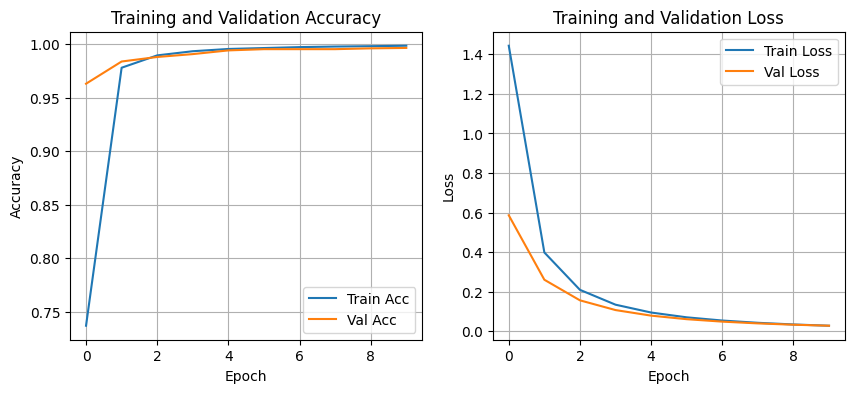


> Evaluating model...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.9998 - loss: 0.0195
Accuracy on test data: 0.9985
Loss on test data: 0.0276

> Predicting images in test_data...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step

> Print Classification Report :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      1.00      1.00       100
           D       1.00      1.00      1.00       100
           E       1.00      1.00      1.00       100
           F       1.00      1.00      1.00       100
           G       1.00      1.00      1.00       100
           H       1.00      1.00      1.00       100
           I       1.00      1.00      1.00       100
           J       1.00      1.00      1.00       100
           K       0.98      1.00      0.99       100
           L       1.00      1.00      1.00       100
           M       1.00   

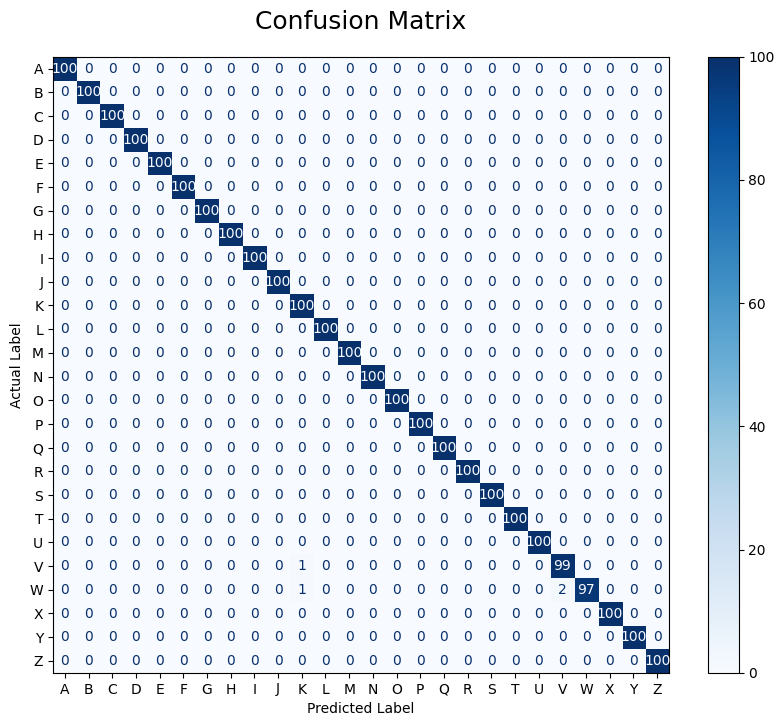

In [18]:
resnet_base = custom_tlmodel(num_classes, base='resnet', dense_layer_units=None)
resnet_ori, resnet_ori_history = train_model(resnet_base, train_data_augmented, val_data, epoch=10)
visualize_history(resnet_ori_history)
print_evaluation(resnet_ori, test_data, class_names)

In [19]:
save_convert_model(resnet_ori, 'resnet', ['pkl', 'h5', 'keras'])


----------------------------------------------------------------------------

> Saving model 'saved_models/resnet.pkl'...
Model: 'saved_models/resnet.pkl' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/resnet.h5'...
Keras model: 'saved_models/resnet.h5' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/resnet.keras'...
Keras model: 'saved_models/resnet.keras' saved successfully.

----------------------------------------------------------------------------

> Converting 'resnet' model to TensorFlow.js...
failed to lookup keras version from the file,
    this is likely a weight only file
Model successfully converted to tfjs and saved at: 'tfjs_models/resnet'

----------------------------------------------------------------------------


## DenseNet

> Instantiating DenseNet121 model...
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_4 (InputLayer)          │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ true_divide (TrueDivide)            │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ add_1 (Add)                         │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ true_divide_1 (TrueDivide)          │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ densenet121 (Functional)            │ (None, 7, 7, 1024)           │     7,037,504 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d_1          │ (None, 1024)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)                     │ (None, 26)                   │        26,650 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 7,064,154 (26.95 MB)

 Trainable params: 26,650 (104.10 KB)

 Non-trainable params: 7,037,504 (26.85 MB)


Create model with base model: densenet, dense layer: None, classes: 26

> Start model training...

Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 103s 113ms/step - accuracy: 0.2410 - loss: 2.8636 - val_accuracy: 0.7681 - val_loss: 1.7000 - learning_rate: 1.0000e-04
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 53s 82ms/step - accuracy: 0.8586 - loss: 1.4241 - val_accuracy: 0.9323 - val_loss: 0.9824 - learning_rate: 1.0000e-04
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.9481 - loss: 0.8504 - val_accuracy: 0.9612 - val_loss: 0.6449 - learning_rate: 1.0000e-04
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.9703 - loss: 0.5744 - val_accuracy: 0.9673 - val_loss: 0.4601 - learning_rate: 1.0000e-04
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.9799 - loss: 0.4179 - val_accuracy: 0.9719 - val_loss: 0.3469 - learning_rate: 1.0000e-04
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.9845 - loss: 0.3188 - val_accuracy: 0.97

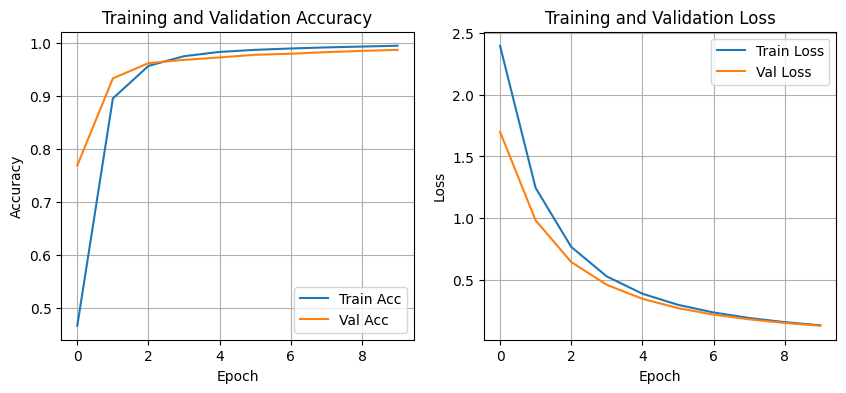


> Evaluating model...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9954 - loss: 0.1271
Accuracy on test data: 0.9881
Loss on test data: 0.1283

> Predicting images in test_data...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step

> Print Classification Report :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      0.99      0.99       100
           D       1.00      1.00      1.00       100
           E       1.00      1.00      1.00       100
           F       1.00      1.00      1.00       100
           G       0.98      1.00      0.99       100
           H       1.00      0.99      0.99       100
           I       1.00      1.00      1.00       100
           J       1.00      1.00      1.00       100
           K       0.96      1.00      0.98       100
           L       1.00      1.00      1.00       100
           M       0.98   

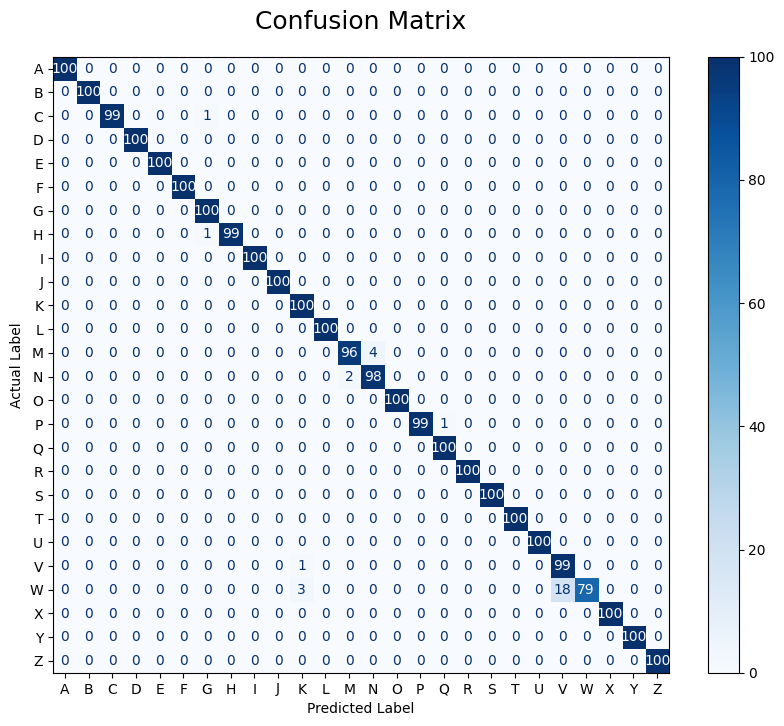

In [17]:
densenet_base = custom_tlmodel(num_classes, base='densenet', dense_layer_units=None)
densenet_ori, densenet_ori_history = train_model(densenet_base, train_data_augmented, val_data, epoch=10)
visualize_history(densenet_ori_history)
print_evaluation(densenet_ori, test_data, class_names)

In [18]:
save_convert_model(densenet_ori, 'densenet', ['pkl', 'h5', 'keras'])


----------------------------------------------------------------------------

> Saving model 'saved_models/densenet.pkl'...
Model: 'saved_models/densenet.pkl' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/densenet.h5'...
Keras model: 'saved_models/densenet.h5' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/densenet.keras'...
Keras model: 'saved_models/densenet.keras' saved successfully.

----------------------------------------------------------------------------

> Converting 'densenet' model to TensorFlow.js...
failed to lookup keras version from the file,
    this is likely a weight only file
Model successfully converted to tfjs and saved at: 'tfjs_models/densenet'

----------------------------------------------------------------------------


## MobileNetv2

> Instantiating MobileNetV2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_6 (InputLayer)          │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ true_divide_2 (TrueDivide)          │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ subtract (Subtract)                 │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mobilenetv2_1.00_224 (Functional)   │ (None, 7, 7, 1280)           │     2,257,984 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d_2          │ (None, 1280)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_2 (Dense)                     │ (None, 26)                   │        33,306 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 2,291,290 (8.74 MB)

 Trainable params: 33,306 (130.10 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Create model with base model: mobilenetv2, dense layer: None, classes: 26

> Start model training...

Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.4681 - loss: 2.2652 - val_accuracy: 0.9642 - val_loss: 0.5891 - learning_rate: 1.0000e-04
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9688 - loss: 0.4697 - val_accuracy: 0.9850 - val_loss: 0.2685 - learning_rate: 1.0000e-04
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9851 - loss: 0.2297 - val_accuracy: 0.9896 - val_loss: 0.1656 - learning_rate: 1.0000e-04
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9898 - loss: 0.1451 - val_accuracy: 0.9927 - val_loss: 0.1155 - learning_rate: 1.0000e-04
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9920 - loss: 0.1022 - val_accuracy: 0.9942 - val_loss: 0.0860 - learning_rate: 1.0000e-04
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9951 - loss: 0.0765 - val_accuracy: 0.9

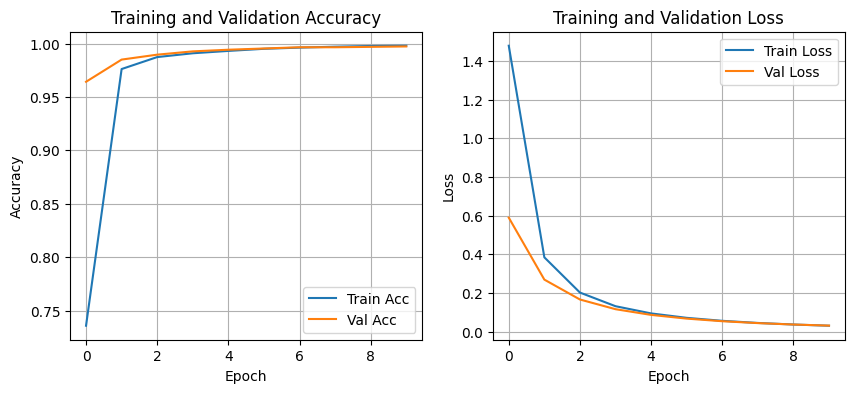


> Evaluating model...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9958 - loss: 0.0289
Accuracy on test data: 0.9954
Loss on test data: 0.0342

> Predicting images in test_data...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step

> Print Classification Report :
              precision    recall  f1-score   support

           A       0.99      1.00      1.00       100
           B       1.00      0.99      0.99       100
           C       0.99      1.00      1.00       100
           D       1.00      1.00      1.00       100
           E       0.99      1.00      1.00       100
           F       1.00      0.99      0.99       100
           G       0.99      1.00      1.00       100
           H       1.00      0.99      0.99       100
           I       1.00      0.97      0.98       100
           J       1.00      1.00      1.00       100
           K       1.00      1.00      1.00       100
           L       1.00      1.00      1.00       100
           M       1.00   

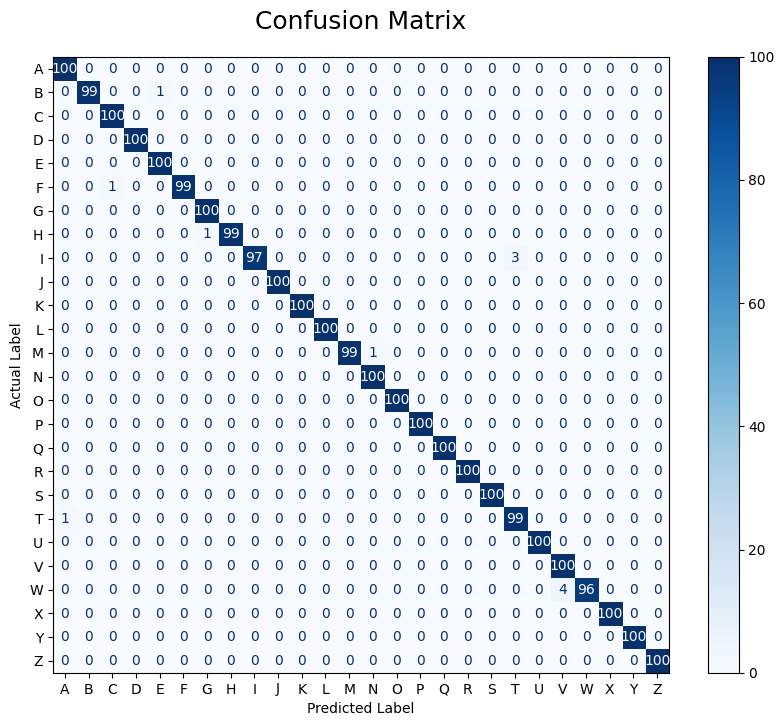

In [20]:
mobilenetv2_base = custom_tlmodel(num_classes, base='mobilenetv2', dense_layer_units=None)
mobilenetv2_ori, mobilenetv2_ori_history = train_model(mobilenetv2_base, train_data_augmented, val_data, epoch=10)
visualize_history(mobilenetv2_ori_history)
print_evaluation(mobilenetv2_ori, test_data, class_names)

In [21]:
save_convert_model(mobilenetv2_ori, 'mobilenetv2', ['pkl', 'h5', 'keras'])


----------------------------------------------------------------------------

> Saving model 'saved_models/mobilenetv2.pkl'...
Model: 'saved_models/mobilenetv2.pkl' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/mobilenetv2.h5'...
Keras model: 'saved_models/mobilenetv2.h5' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/mobilenetv2.keras'...
Keras model: 'saved_models/mobilenetv2.keras' saved successfully.

----------------------------------------------------------------------------

> Converting 'mobilenetv2' model to TensorFlow.js...
failed to lookup keras version from the file,
    this is likely a weight only file
Model successfully converted to tfjs and saved at: 'tfjs_models/mobilenetv2'

----------------------------------------------------------------------------


# CNN Model Architectures

In [23]:
cnn3 = tf.keras.Sequential([
              tf.keras.Input(shape=(224, 224, 3)),
              tf.keras.layers.Rescaling(1./255),
              tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(num_classes, activation='softmax')
            ])
cnn3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437,946 (1.67 MB)

 Trainable params: 437,946 (1.67 MB)

 Non-trainable params: 0 (0.00 B)


> Start model training...

Epoch 1/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1528 - loss: 2.8810 - val_accuracy: 0.7592 - val_loss: 0.7521 - learning_rate: 1.0000e-04
Epoch 2/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7356 - loss: 0.7999 - val_accuracy: 0.9227 - val_loss: 0.2604 - learning_rate: 1.0000e-04
Epoch 3/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.8784 - loss: 0.3591 - val_accuracy: 0.9400 - val_loss: 0.1815 - learning_rate: 1.0000e-04
Epoch 4/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9300 - loss: 0.2160 - val_accuracy: 0.9681 - val_loss: 0.0971 - learning_rate: 1.0000e-04
Epoch 5/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9541 - loss: 0.1503 - val_accuracy: 0.9735 - val_loss: 0.0789 - learning_rate: 1.0000e-04
Epoch 6/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9666 - loss: 0.1108 - val_accuracy: 0.9819 - val_loss: 0.0650 - learning_rate: 1.0000e-04
Epoch 7/20
650/650 ━━━━━

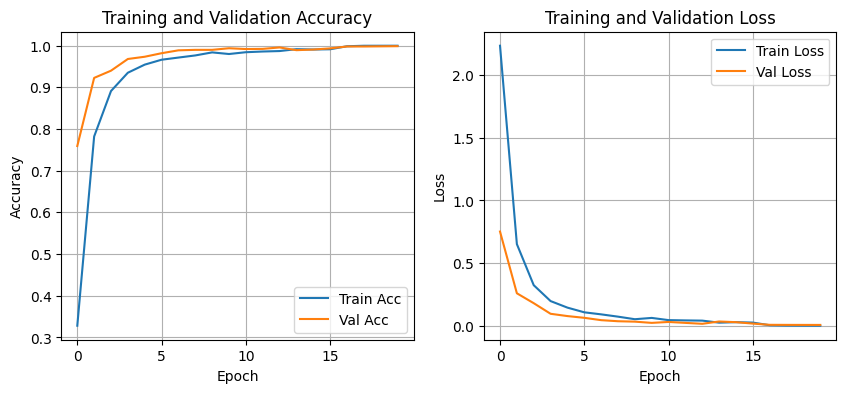


> Evaluating model...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9985 - loss: 0.0035
Accuracy on test data: 0.9981
Loss on test data: 0.0040

> Predicting images in test_data...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

> Print Classification Report :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      1.00      1.00       100
           D       1.00      1.00      1.00       100
           E       1.00      1.00      1.00       100
           F       1.00      1.00      1.00       100
           G       0.98      1.00      0.99       100
           H       1.00      0.98      0.99       100
           I       1.00      1.00      1.00       100
           J       1.00      1.00      1.00       100
           K       0.99      1.00      1.00       100
           L       1.00      1.00      1.00       100
           M       1.00     

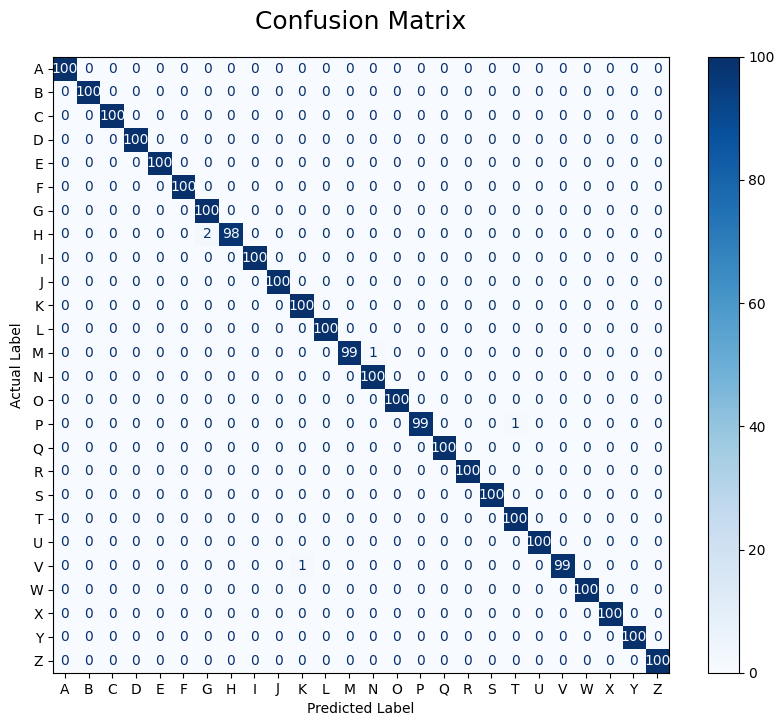

In [24]:
model_cnn3, model_cnn3_history = train_model(cnn3, train_data_augmented, val_data, epoch=20)
visualize_history(model_cnn3_history)
print_evaluation(model_cnn3, test_data, class_names)

In [25]:
save_convert_model(model_cnn3, 'cnn3', ['pkl', 'h5', 'keras'])


----------------------------------------------------------------------------

> Saving model 'saved_models/cnn3.pkl'...
Model: 'saved_models/cnn3.pkl' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/cnn3.h5'...
Keras model: 'saved_models/cnn3.h5' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/cnn3.keras'...
Keras model: 'saved_models/cnn3.keras' saved successfully.

----------------------------------------------------------------------------

> Converting 'cnn3' model to TensorFlow.js...
failed to lookup keras version from the file,
    this is likely a weight only file
Model successfully converted to tfjs and saved at: 'tfjs_models/cnn3'

----------------------------------------------------------------------------


# Bukti Inference

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


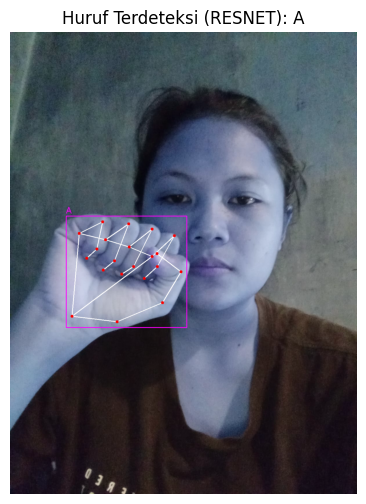

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


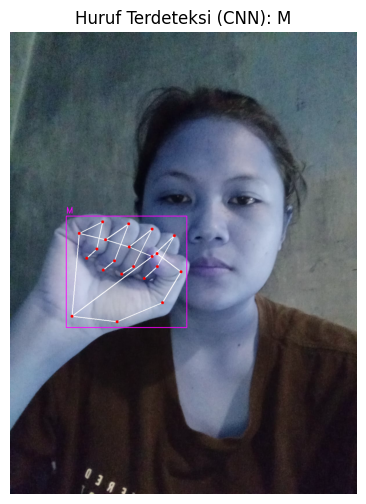

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


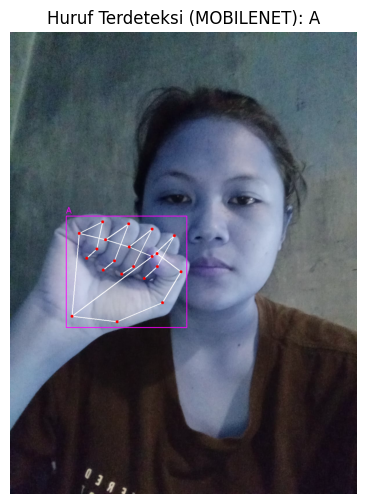

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


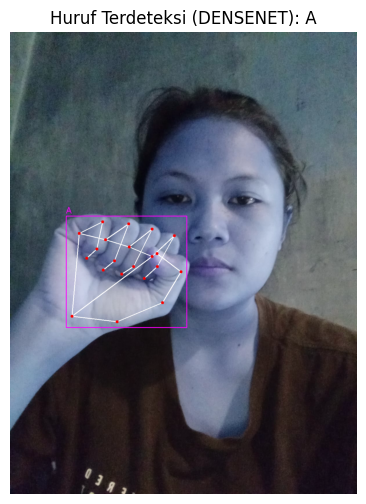

In [25]:
# Gunakan ResNet
predict_hand_letter("/kaggle/input/huruff/A.jpg", model_name="resnet")

# Gunakan CNN
predict_hand_letter("/kaggle/input/huruff/A.jpg", model_name="cnn")

# Gunakan MobileNet
predict_hand_letter("/kaggle/input/huruff/A.jpg", model_name="mobilenet")

# Gunakan DenseNet
predict_hand_letter("/kaggle/input/huruff/A.jpg", model_name="densenet")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


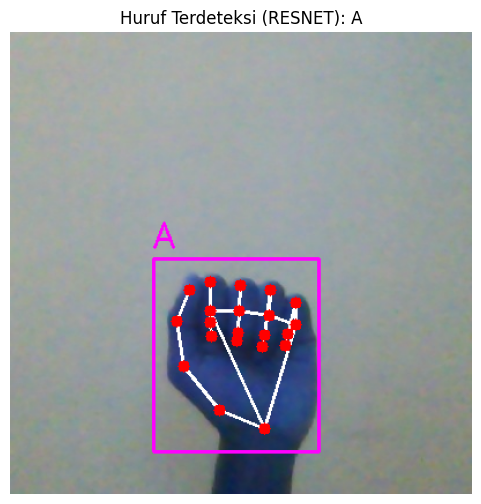

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


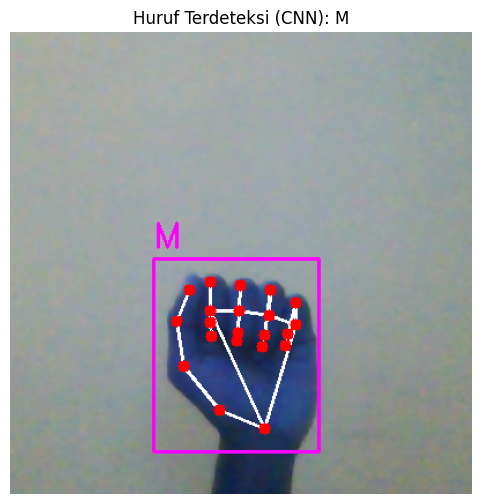

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


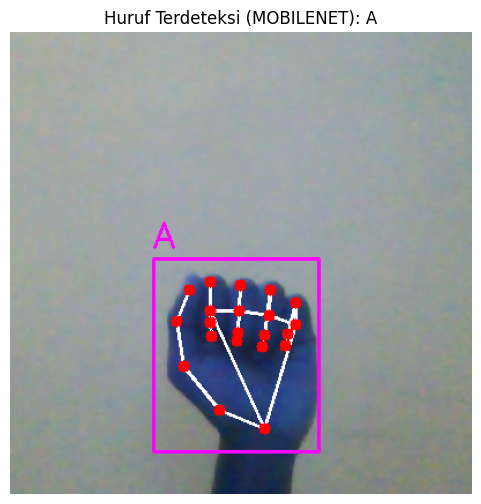

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


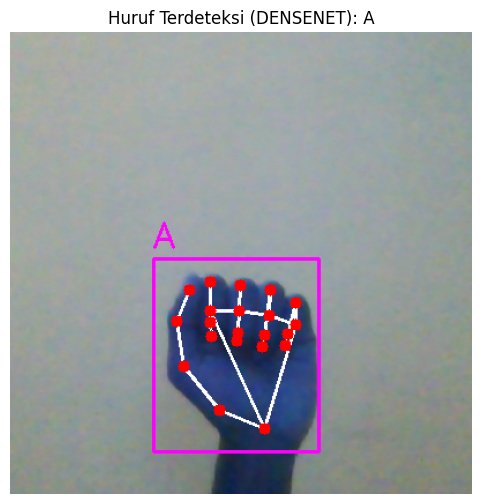

In [27]:
# Gunakan ResNet
predict_hand_letter("/kaggle/input/inference/1024.jpg", model_name="resnet")

# Gunakan CNN
predict_hand_letter("/kaggle/input/inference/1024.jpg", model_name="cnn")

# Gunakan MobileNet
predict_hand_letter("/kaggle/input/inference/1024.jpg", model_name="mobilenet")

# Gunakan DenseNet
predict_hand_letter("/kaggle/input/inference/1024.jpg", model_name="densenet")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


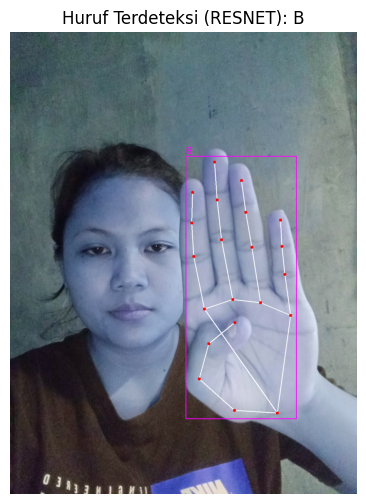

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step


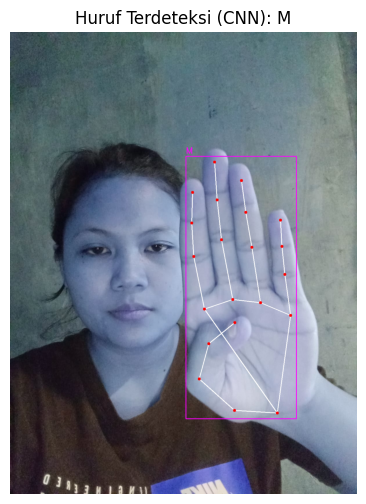

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


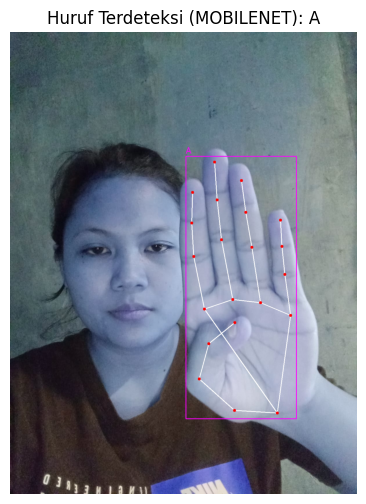

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


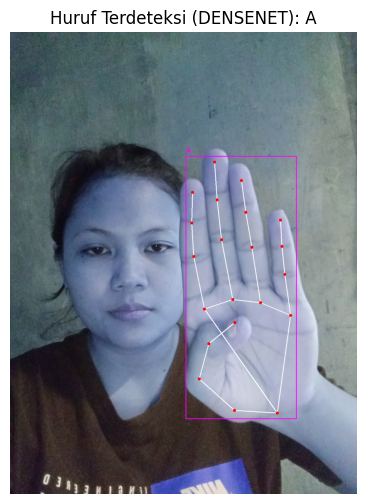

In [28]:
# Gunakan ResNet
predict_hand_letter("/kaggle/input/kakakk/k.jpg", model_name="resnet")

# Gunakan CNN
predict_hand_letter("/kaggle/input/kakakk/k.jpg", model_name="cnn")

# Gunakan MobileNet
predict_hand_letter("/kaggle/input/kakakk/k.jpg", model_name="mobilenet")

# Gunakan DenseNet
predict_hand_letter("/kaggle/input/kakakk/k.jpg", model_name="densenet")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


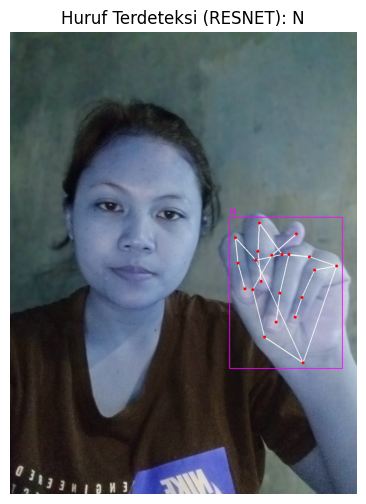

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


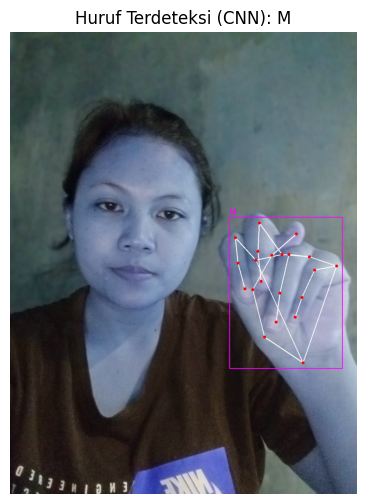

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


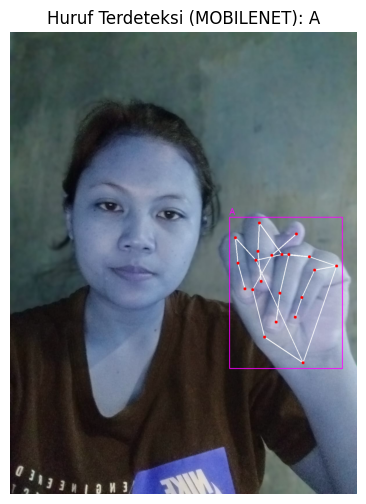

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


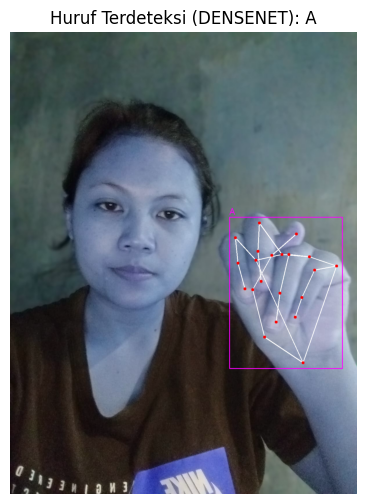

In [30]:
# Gunakan ResNet
predict_hand_letter("/kaggle/input/nnnnnn/n.jpg", model_name="resnet")

# Gunakan CNN
predict_hand_letter("/kaggle/input/nnnnnn/n.jpg", model_name="cnn")

# Gunakan MobileNet
predict_hand_letter("/kaggle/input/nnnnnn/n.jpg", model_name="mobilenet")

# Gunakan DenseNet
predict_hand_letter("/kaggle/input/nnnnnn/n.jpg", model_name="densenet")

# Zip and Download Saved Model

In [50]:
# zip folder saved_models 
%cd /kaggle/working/
!zip -r saved_models.zip saved_models/

/kaggle/working
  adding: saved_models/ (stored 0%)
  adding: saved_models/mobilenetv2.pkl (deflated 12%)
  adding: saved_models/resnet.h5 (deflated 8%)
  adding: saved_models/resnet.keras (deflated 8%)
  adding: saved_models/resnet.pkl (deflated 8%)
  adding: saved_models/densenet.h5 (deflated 9%)
  adding: saved_models/cnn3.keras (deflated 10%)
  adding: saved_models/densenet.pkl (deflated 11%)
  adding: saved_models/mobilenetv2.keras (deflated 12%)
  adding: saved_models/cnn3.pkl (deflated 10%)
  adding: saved_models/cnn3.h5 (deflated 10%)
  adding: saved_models/densenet.keras (deflated 11%)
  adding: saved_models/mobilenetv2.h5 (deflated 10%)


In [52]:
# link to download saved_models.zip
FileLink(r'saved_models.zip')

/kaggle/working/saved_models.zip

In [54]:
# zip folder tfjs_models
%cd /kaggle/working/
!zip -r tfjs_models.zip tfjs_models/

/kaggle/working
  adding: tfjs_models/ (stored 0%)
  adding: tfjs_models/densenet/ (stored 0%)
  adding: tfjs_models/densenet/model.json (deflated 97%)
  adding: tfjs_models/densenet/group1-shard5of7.bin (deflated 7%)
  adding: tfjs_models/densenet/group1-shard1of7.bin (deflated 6%)
  adding: tfjs_models/densenet/group1-shard7of7.bin (deflated 6%)
  adding: tfjs_models/densenet/group1-shard3of7.bin (deflated 7%)
  adding: tfjs_models/densenet/group1-shard6of7.bin (deflated 6%)
  adding: tfjs_models/densenet/group1-shard4of7.bin (deflated 7%)
  adding: tfjs_models/densenet/group1-shard2of7.bin (deflated 7%)
  adding: tfjs_models/mobilenetv2/ (stored 0%)
  adding: tfjs_models/mobilenetv2/model.json (deflated 97%)
  adding: tfjs_models/mobilenetv2/group1-shard1of3.bin (deflated 7%)
  adding: tfjs_models/mobilenetv2/group1-shard3of3.bin (deflated 7%)
  adding: tfjs_models/mobilenetv2/group1-shard2of3.bin (deflated 7%)
  adding: tfjs_models/cnn3/ (stored 0%)
  adding: tfjs_models/cnn3/model

In [56]:
# link to download tfjs_models.zip
FileLink(r'tfjs_models.zip')

/kaggle/working/tfjs_models.zip